In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data from the CSV file
data = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])

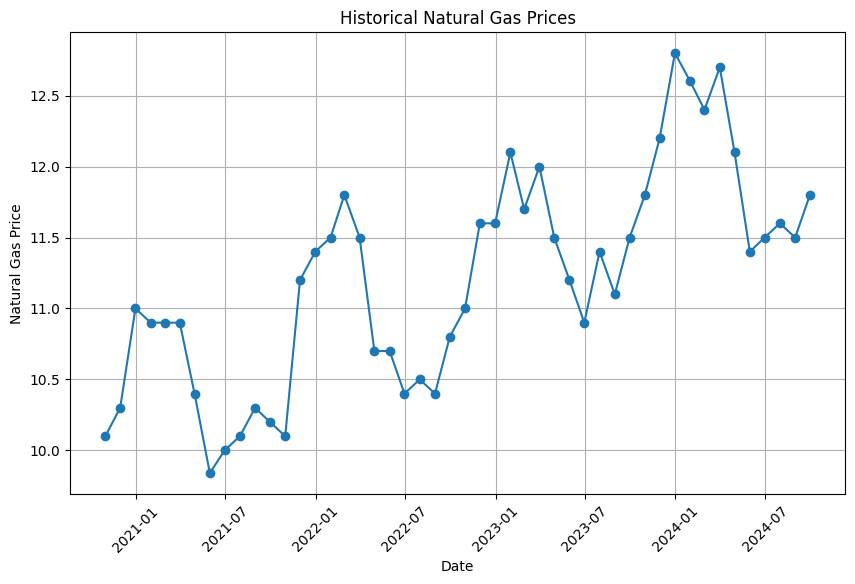

In [3]:
# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Historical Natural Gas Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [4]:
def estimate_price(date):
    # Convert the input date to datetime
    date = pd.to_datetime(date)

    # Extract the month and day from the input date
    month = date.month
    day = date.day

    # Filter the data to include only the relevant month and next year
    relevant_data = data[(data['Dates'].dt.month == month) & (data['Dates'].dt.year <= date.year + 1)]

    # Linear interpolation
    price_estimate = np.interp(day, relevant_data['Dates'].dt.day, relevant_data['Prices'])

    return price_estimate


In [5]:
# Test the estimate_price function
input_date = '2025-05-15'
estimated_price = estimate_price(input_date)
print(f"Estimated Natural Gas Price on {input_date}: {estimated_price:.2f}")

Estimated Natural Gas Price on 2025-05-15: 9.84


In [6]:
def calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month):
    total_value = 0

    # Iterate through each injection and withdrawal pair
    for i in range(len(injection_dates)):
        injection_date = injection_dates[i]
        withdrawal_date = withdrawal_dates[i]
        purchase_price = purchase_prices[i]
        sale_price = sale_prices[i]

        # Calculate the time between injection and withdrawal in months
        time_months = (withdrawal_date - injection_date).days / 30.44

        # Calculate the gas cost and sale revenue
        gas_cost = purchase_price * injection_rate * time_months
        sale_revenue = sale_price * injection_rate * time_months

        # Calculate storage costs
        storage_months = (withdrawal_date - injection_date).days / 30.44
        total_storage_cost = storage_cost_per_month * storage_months

        # Calculate total cost and value
        total_cost = gas_cost + total_storage_cost
        contract_value = sale_revenue - total_cost

        # Add contract value to total
        total_value += contract_value

    return total_value


In [7]:
# Test the calculate_contract_value function
injection_dates = [pd.to_datetime('2023-05-15'), pd.to_datetime('2023-06-15')]
withdrawal_dates = [pd.to_datetime('2023-09-15'), pd.to_datetime('2023-11-15')]
purchase_prices = [2.5, 2.6]  # $/MMBtu
sale_prices = [3.5, 3.6]  # $/MMBtu
injection_rate = 1000000  # MMBtu
max_volume = 5000000  # MMBtu
storage_cost_per_month = 100000  # $

contract_value = calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month)
print(f"Estimated Contract Value: ${contract_value:.2f}")

Estimated Contract Value: $8160315.37


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data from the Excel sheet
data = pd.read_csv('Task 3 and 4_Loan_Data.csv')

# Split the data into features (X) and target (y)
X = data.drop(['customer_id', 'default'], axis=1)
y = data['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Evaluate models on the test set
logreg_pred = logreg_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
linear_reg_pred = (linear_reg_model.predict(X_test_scaled) >= 0.5).astype(int)
dt_pred = dt_model.predict(X_test_scaled)

logreg_accuracy = accuracy_score(y_test, logreg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
linear_reg_accuracy = accuracy_score(y_test, linear_reg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

logreg_confusion_matrix = confusion_matrix(y_test, logreg_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
linear_reg_confusion_matrix = confusion_matrix(y_test, linear_reg_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Simple Linear Regression Accuracy:", linear_reg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

print("Logistic Regression Confusion Matrix:\n", logreg_confusion_matrix)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
print("Simple Linear Regression Confusion Matrix:\n", linear_reg_confusion_matrix)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)


Logistic Regression Accuracy: 0.9955
Random Forest Accuracy: 0.995
Simple Linear Regression Accuracy: 0.9865
Decision Tree Accuracy: 0.9935
Logistic Regression Confusion Matrix:
 [[1651    1]
 [   8  340]]
Random Forest Confusion Matrix:
 [[1650    2]
 [   8  340]]
Simple Linear Regression Confusion Matrix:
 [[1627   25]
 [   2  346]]
Decision Tree Confusion Matrix:
 [[1647    5]
 [   8  340]]


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

# Load the data from the CSV file
data = pd.read_csv('Task 3 and 4_Loan_Data.csv')

# Split the data into features (X) and target (y)
X = data.drop(['customer_id', 'default'], axis=1)
y = data['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Predict default probabilities on the test set
default_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Get FICO scores from the test set
fico_scores = X_test['fico_score']

# Calculate the mean squared error for different bucket boundaries
mse_values = []
num_buckets = 5  # You can adjust the number of buckets

for i in range(1, num_buckets):
    bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, i + 1))
    bucket_predictions = [default_probs[(fico_scores >= bucket_boundaries[j]) & (fico_scores <= bucket_boundaries[j + 1])].mean() for j in range(i)]
    mse = mean_squared_error(bucket_predictions, y_test[:len(bucket_predictions)])  # Ensure lengths match
    mse_values.append((i, mse))

# Find the optimal number of buckets with minimum MSE
optimal_num_buckets = min(mse_values, key=lambda x: x[1])[0]
print("Optimal Number of Buckets:", optimal_num_buckets)

# Calculate bucket boundaries based on the optimal number of buckets
optimal_bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, optimal_num_buckets + 1))

print("Optimal Bucket Boundaries:", optimal_bucket_boundaries)

# Calculate log-likelihood values for different bucket boundaries
log_likelihood_values = []
num_buckets = 5  # You can adjust the number of buckets

for i in range(1, num_buckets):
    bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, i + 1))
    bucket_indices = np.digitize(fico_scores, bucket_boundaries) - 1

    bucket_probabilities = [default_probs[bucket_indices == j].mean() for j in range(i)]
    bucket_defaults = [y_test[bucket_indices == j].sum() for j in range(i)]
    bucket_total = [len(y_test[bucket_indices == j]) for j in range(i)]
    bucket_likelihood = sum([(default * np.log(prob) + (total - default) * np.log(1 - prob)) for default, prob, total in zip(bucket_defaults, bucket_probabilities, bucket_total)])

    log_likelihood_values.append((i, bucket_likelihood))

# Find the optimal number of buckets with maximum log-likelihood
optimal_num_buckets = max(log_likelihood_values, key=lambda x: x[1])[0]
print("Optimal Number of Buckets (Log-Likelihood):", optimal_num_buckets)

# Calculate bucket boundaries based on the optimal number of buckets
optimal_bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, optimal_num_buckets + 1))

print("Optimal Bucket Boundaries (Log-Likelihood):", optimal_bucket_boundaries)


Optimal Number of Buckets: 1
Optimal Bucket Boundaries: [425. 831.]
Optimal Number of Buckets (Log-Likelihood): 3
Optimal Bucket Boundaries (Log-Likelihood): [425.         613.         664.66666667 831.        ]
